## ECT and IECT Fast transform testing

In [1]:
import ect
import numpy as np
import cv2
import matplotlib.pyplot as plt

# source_image_path = "../sample_imgs/logpolar_test.png"
source_image_path = "../sample_imgs/ruler.png"

cfg = ect.ECT_INTER_NONE

## Loading image

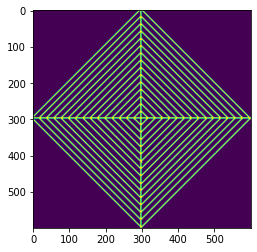

In [2]:
source_image = cv2.imread(source_image_path)
source_image = cv2.cvtColor(source_image, cv2.COLOR_RGB2GRAY)

# source_image = 255*np.ones((100,100), dtype=np.uint8)

f = plt.imshow(source_image)

radius = 400
img_offset = radius/10
ect_offset = radius/5

config = ect.ECT_OFFSET_ORIGIN | ect.ECT_START_NY

### Logpolar transform of the image

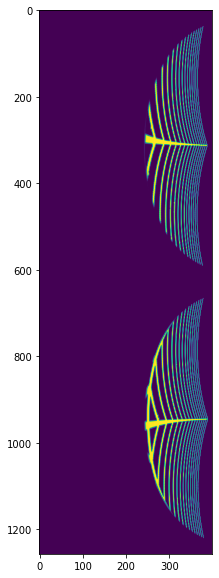

In [3]:
log_image = ect.logpolar(
    source_image, 
    offset=img_offset, 
    radius=radius, 
    flags=config)

filt = ect.sidelobe(
    log_image.shape[:2], 
    offset=img_offset*1.45, 
    flags=config)

log_image = np.uint8(log_image*filt)

f = plt.figure(figsize=(5, 10))
plt.imshow(log_image)

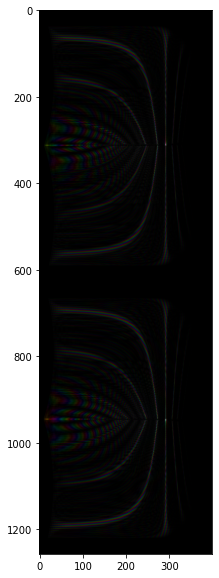

In [4]:
ect_image = ect.fect(log_image, img_offset, ect_offset, config | ect.ECT_ANTIALIAS)

# filt = ect.sidelobe(ect_image.shape, offset=ect_offset, flags=config)
# ect_image = ect_image * filt
# ect_hsv = ect.norm_minmax(np.abs(ect_image), 0, 1, np.)
ect_hsv = ect.complex_to_hsv(ect_image)

fig = plt.figure(figsize=(10,10))
f = plt.imshow(ect_hsv)

/home/mateusz/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Casting input data from float128 to float64 for imshow
  fig.canvas.print_figure(bytes_io, **kw)


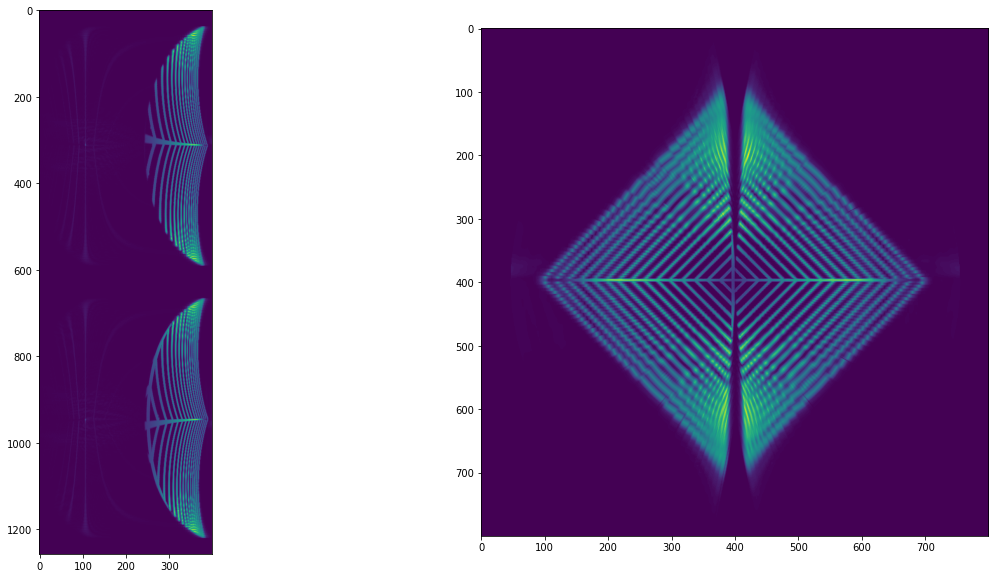

In [5]:
iect_img = ect.ifect(ect_image, img_offset, ect_offset, config | ect.ECT_ANTIALIAS)

inv_log = ect.norm_minmax(np.abs(iect_img), 0, 100, dtype=np.float128)
inv = ect.ilogpolar(inv_log, offset=img_offset, flags=config) 
inv = cv2.cvtColor(inv, cv2.COLOR_BGR2GRAY)
inv = ect.norm_minmax(inv, 0, 100, dtype=np.float64)

fig = plt.figure(figsize=(20, 10))

f = plt.subplot(1, 2, 1)
f.imshow(inv_log)

f = plt.subplot(1, 2, 2)
f.imshow(inv)